# Brute-Force-Algorithmus für das Traveling Salesman Problem

---

## 1. Einführung in das Problem

Das **Traveling Salesman Problem (TSP)** ist ein klassisches Problem der Informatik und Optimierung. Es modelliert folgende Situation:

Ein Reisender soll mehrere Punkte besuchen. Er möchte dabei:
- Jeden Punkt genau einmal besuchen
- Am Ende zu seinem Ausgangspunkt zurückkehren
- Die zurückgelegte Gesamtstrecke minimieren

**Anwendungsbeispiele:**
- Tourenplanung für Lieferfahrzeuge
- Optimierung von Wartungsrouten
- Leiterplattenherstellung (optimale Anordnung von Bohrungen)
- Genomsequenzierung

## 2. Mathematische Formulierung

Das Traveling Salesman Problem lässt sich mathematisch wie folgt formalisieren:

Sei $G = (V, E)$ ein vollständiger Graph mit:
- $V = \{1, 2, ..., n\}$ ist die Menge der Knoten (Punkte)
- $E = \{(i, j) | i, j \in V, i \neq j\}$ ist die Menge der Kanten (Verbindungen zwischen Punkten)
- $c: E \rightarrow \mathbb{R}^+$ ist eine Kostenfunktion, die jeder Kante $(i, j) \in E$ ein Gewicht $c_{ij}$ zuordnet (die Entfernung zwischen Punkt $i$ und Punkt $j$)

**Ziel:** Finde einen Hamiltonkreis mit minimalen Gesamtkosten. Ein Hamiltonkreis ist ein geschlossener Pfad, der jeden Knoten genau einmal besucht und zum Ausgangspunkt zurückkehrt.

**Mathematische Formulierung:** Gesucht ist eine Permutation $\pi$ von $\{1, 2, ..., n\}$, die die folgende Kostenfunktion minimiert:

$$ \sum_{i=1}^{n-1} c_{\pi(i),\pi(i+1)} + c_{\pi(n),\pi(1)} $$

**Komplexitätsklasse:** Das TSP ist NP-schwer. Dies bedeutet, dass kein effizienter (polynomieller) Algorithmus bekannt ist, der optimale Lösungen für beliebig große Instanzen garantiert.

**Konsequenz für die Praxis:** Bei $n$ Punkten gibt es $(n-1)!/2$ verschiedene mögliche Routen. Bei 10 Punkten sind dies bereits über 180.000 Routen, bei 15 Punkten über 43 Milliarden.

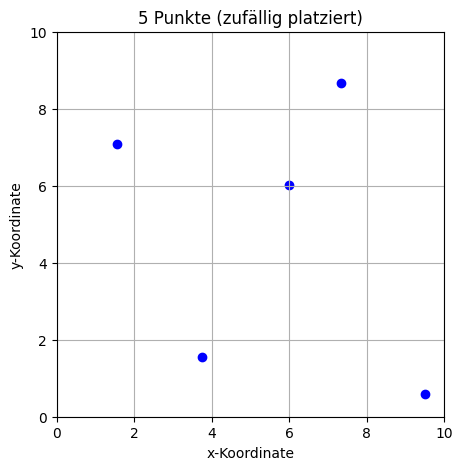

In [29]:
# Vorbereitung: Notwendige Bibliotheken importieren und Testdaten generieren

import numpy as np
import matplotlib.pyplot as plt
import math
import time  # Für Zeitmessungen der Algorithmen

# Hilfsfunktion zum Visualisieren der Punktemenge
def plot():
    plt.figure(figsize=(5, 5))
    plt.scatter(x, y, color='blue')  # Punkte als Scatterplot darstellen
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.grid(True)
    plt.title(f'{number_of_points} Punkte (zufällig platziert)')
    plt.xlabel('x-Koordinate')
    plt.ylabel('y-Koordinate')
    plt.show()

# Für die Reproduzierbarkeit: Feste Zufallszahlen
number_of_points = 5  # Anzahl der Punkte (Punkte)
np.random.seed(42)    # Für reproduzierbare Ergebnisse

# Generiere zufällige Koordinaten im Bereich [0, 10] × [0, 10]
x = np.random.rand(number_of_points) * 10  # x-Koordinaten
y = np.random.rand(number_of_points) * 10  # y-Koordinaten

# Erstelle Liste von Punkten als (x,y)-Koordinatenpaare
points = list(zip(x, y))

# Dictionary für spätere Ergebnisauswertung vorbereiten
algorithm_results = {
    'brute_force': {'distance': None, 'time': None, 'operations': None}
}

# Visualisiere die generierten Punkte
plot()

## 3. Exakte Lösung: Brute-Force-Algorithmus

Der einfachste Ansatz zur Lösung des TSP ist die vollständige Aufzählung aller möglichen Routen, auch als Brute-Force-Ansatz bekannt.

### 3.1 Grundprinzip

1. Generiere systematisch alle möglichen Rundwege (Permutationen der Punkte)
2. Berechne für jeden Rundweg die Gesamtlänge
3. Wähle den kürzesten Rundweg

### 3.2 Mathematische Analyse

**Anzahl möglicher Rundwege:** Bei $n$ Punkten gibt es $(n-1)!$ verschiedene Rundwege (die erste Punkt kann festgelegt werden, danach müssen die restlichen $n-1$ Punkte permutiert werden).

**Korrektheit:** Der Algorithmus findet garantiert das globale Optimum, da er alle möglichen Lösungen prüft.

**Zeitkomplexität:** $O(n!)$ - faktoriell in der Anzahl der Punkte.
 - Bei $n=10$ Punkten: ca. 3,6 Millionen Permutationen
 - Bei $n=15$ Punkten: ca. 87 Milliarden Permutationen
 - Bei $n=20$ Punkten: ca. $10^{18}$ Permutationen

**Speicherkomplexität:** $O(n)$ - linear, da wir jeweils nur eine Permutation im Speicher halten müssen.

### 3.3 Implementierungsdetails

Wir verwenden das `permutations`-Modul aus `itertools` zur effizienten Generierung aller Permutationen:

In [30]:
from itertools import permutations
import math

# Distanzfunktion zur Berechnung der Gesamtlänge einer Route
def route_distance(route):
    # Für eine gegebene Route berechnen wir die Gesamtdistanz,
    # indem wir die Distanzen zwischen jedem aufeinanderfolgenden Punktpaar aufsummieren.
    # Dabei wird math.dist() verwendet, um die euklidische Distanz zwischen zwei Punkten zu berechnen.
    d = sum(math.dist(route[i], route[i+1]) for i in range(len(route)-1))
    
    # Abschließend wird die Distanz vom letzten Punkt zurück zum Startpunkt addiert,
    # um den Rundweg zu schließen.
    return d + math.dist(route[-1], route[0])

In [31]:
def plot_brute_force(best_route, best_distance):
    # Erstelle eine Grafik und plotte die Punkte
    plt.clf()  # Aktuelle Grafik löschen

    # Extrahiere die x- und y-Koordinaten aller Punkte und plote sie als blauen Scatterplot.
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    plt.scatter(x_coords, y_coords, color='blue', zorder=3)

    # Erstelle Listen für die x- und y-Koordinaten der Route.
    # Schließe die Route, indem du den Startpunkt am Ende wieder hinzufügst.
    xs = [p[0] for p in best_route] + [best_route[0][0]]
    ys = [p[1] for p in best_route] + [best_route[0][1]]
    # Verbinde die Punkte der Route mit einer roten Linie und markiere jeden Punkt.
    plt.plot(xs, ys, color='red', linewidth=2, marker='o')

    # Füge einen Titel hinzu, der die Gesamtdistanz der Route anzeigt.
    plt.title(f"Brute Force Distance: {best_distance:.2f}")

    # Entferne die Achsenbeschriftungen.
    plt.xticks([])
    plt.yticks([])

    fig = plt.gcf()
    fig.set_size_inches(fig.get_size_inches() * 0.7)
    plt.savefig("brute_force.png", dpi=300, format="png", bbox_inches="tight")
    plt.show()

Beste gefundene Route-Länge: 27.19
Berechnungszeit: 0.000000 Sekunden
Anzahl der überprüften Routen: 120


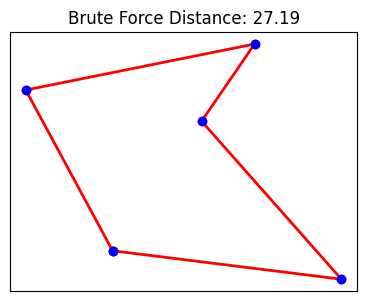

In [32]:
# Ausführung des Brute-Force-Algorithmus
operation_count_bf = 0  # Zähler für Operationen (hier: Berechnungen von Strecken)
start_time_bf = time.time()  # Startzeit messen

best_distance = math.inf # Initialisiere best_distance mit unendlich, sodass jede berechnete Route kürzer ist.
best_route_local = None

# Suche die beste Route, indem alle Permutationen geprüft werden | https://docs.python.org/3/library/itertools.html 
for route in permutations(points): # r-Länge, alle möglichen Permutationen ohne wiederholte Elemente
    operation_count_bf += 1
    d_current = route_distance(route)
    if d_current < best_distance:
        best_distance = d_current
        best_route_local = route
# Laufzeit dieser Funktion: O(n!) https://de.wikipedia.org/wiki/Fakult%C3%A4t_(Mathematik)

end_time_bf = time.time()  # Endzeit messen
execution_time_bf = end_time_bf - start_time_bf  # Berechnungszeit in Sekunden

# Speichere Ergebnisse
algorithm_results['brute_force']['distance'] = best_distance
algorithm_results['brute_force']['time'] = execution_time_bf
algorithm_results['brute_force']['operations'] = operation_count_bf

print(f"Beste gefundene Route-Länge: {best_distance:.2f}")
print(f"Berechnungszeit: {execution_time_bf:.6f} Sekunden")
print(f"Anzahl der überprüften Routen: {operation_count_bf}")

# Visualisiere die gefundene Route
plot_brute_force(best_route_local, best_distance)

## 4. Brute-Force-Algorithmus mit festem Startpunkt

In der obigen Implementierung des Brute-Force-Algorithmus werden alle möglichen Permutationen sämtlicher Punkte betrachtet. Bei $n$ Punkten gibt es $n!$ solcher Permutationen. 

In vielen praktischen Anwendungen ist jedoch der Startpunkt vorgegeben - etwa wenn ein Handelsvertreter immer von seinem Heimatpunkt aus starten und dorthin zurückkehren muss. In diesem Fall reduziert sich die Anzahl der zu betrachtenden Permutationen auf $(n-1)!$, da nur noch die Reihenfolge der anderen Punkte variiert wird.

### Vorteile eines festen Startpunkts:

1. **Reduzierte Berechnungskomplexität**: Statt $n!$ müssen nur $(n-1)!$ Permutationen überprüft werden
2. **Realistische Modellierung**: In vielen praktischen Anwendungsfällen ist der Startpunkt tatsächlich fest
3. **Vereinfachte Problemstellung**: Die Problemgröße wird um einen Faktor $n$ reduziert

### Mathematische Auswirkung:

Bei 10 Punkten mit variablem Startpunkt: $10! = 3.628.800$ Permutationen  
Bei 10 Punkten mit festem Startpunkt: $9! = 362.880$ Permutationen

Die Berechnung wird also um den Faktor 10 schneller, was bei größeren Problemen einen erheblichen Unterschied macht.

In [33]:
def brute_force_fixed_start(points, start_index=0):
    """Berechnet die optimale Route mittels Brute-Force mit festem Startpunkt.
    
    Parameter:
      points (list): Liste von (x,y)-Koordinatenpaaren der Punkte
      start_index (int): Index des Startpunkts in der Liste 'points'
    
    Rückgabe:
      tuple: (beste Route, Distanz der besten Route, Anzahl überprüfter Routen)
    """
    operation_count = 0  # Zähler für die Anzahl überprüfter Routen
    start_time = time.time()
    
    # Extrahiere den Startpunkt
    start_point = points[start_index]
    
    # Erstelle eine Liste der zu permutierenden Punkte (alle außer dem Startpunkt)
    other_points = points.copy()
    other_points.pop(start_index)
    
    best_distance = float('inf')
    best_route = None
    
    # Generiere alle Permutationen der übrigen Punkte
    for perm in permutations(other_points):
        # Erstelle vollständige Route mit Startpunkt am Anfang
        route = (start_point,) + perm
        operation_count += 1
        
        # Berechne die Gesamtdistanz dieser Route
        current_distance = route_distance(route)
        
        # Aktualisiere die beste Route, wenn die aktuelle besser ist
        if current_distance < best_distance:
            best_distance = current_distance
            best_route = route
    
    execution_time = time.time() - start_time
    
    return best_route, best_distance, operation_count, execution_time

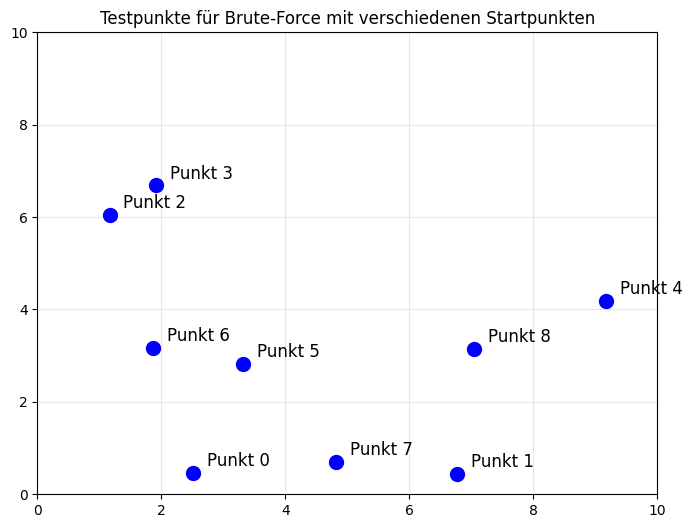

Berechnung der optimalen Routen mit verschiedenen Startpunkten...
------------------------------------------------------------
Startpunkt 0: Distanz = 25.01, Berechnungszeit = 0.096998s, Überprüfte Routen = 40320
Startpunkt 1: Distanz = 25.01, Berechnungszeit = 0.110030s, Überprüfte Routen = 40320
Startpunkt 2: Distanz = 25.01, Berechnungszeit = 0.126989s, Überprüfte Routen = 40320
Startpunkt 3: Distanz = 25.01, Berechnungszeit = 0.110038s, Überprüfte Routen = 40320
Startpunkt 4: Distanz = 25.01, Berechnungszeit = 0.113959s, Überprüfte Routen = 40320
Startpunkt 5: Distanz = 25.01, Berechnungszeit = 0.102004s, Überprüfte Routen = 40320
Startpunkt 6: Distanz = 25.01, Berechnungszeit = 0.115028s, Überprüfte Routen = 40320
Startpunkt 7: Distanz = 25.01, Berechnungszeit = 0.103000s, Überprüfte Routen = 40320
Startpunkt 8: Distanz = 25.01, Berechnungszeit = 0.147966s, Überprüfte Routen = 40320
------------------------------------------------------------
Beste Route insgesamt beginnt bei Punk

In [34]:
# Teste den Brute-Force-Algorithmus mit verschiedenen Startpunkten
results = {}
all_routes = []

# Erzeuge 9 zufällige Punkte für bessere Übersichtlichkeit
np.random.seed(41)  # Anderer Seed für Variation
test_points = [(np.random.rand() * 10, np.random.rand() * 10) for _ in range(9)]

# Visualisiere die Punkte mit Indizes
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(test_points):
    plt.scatter(x, y, color='blue', s=100, zorder=5)
    plt.annotate(f"Punkt {i}", (x, y), xytext=(10, 5), textcoords="offset points", fontsize=12)

plt.grid(True, alpha=0.3)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Testpunkte für Brute-Force mit verschiedenen Startpunkten")
plt.show()

print("Berechnung der optimalen Routen mit verschiedenen Startpunkten...")
print("-" * 60)

# Berechne für jeden möglichen Startpunkt
for i in range(len(test_points)):
    route, distance, operations, execution_time = brute_force_fixed_start(test_points, i)
    results[i] = {
        "distance": distance,
        "operations": operations,
        "time": execution_time
    }
    all_routes.append((i, route, distance))
    print(f"Startpunkt {i}: Distanz = {distance:.2f}, Berechnungszeit = {execution_time:.6f}s, Überprüfte Routen = {operations}")

# Finde die beste Route über alle Startpunkte
best_overall = min(all_routes, key=lambda x: x[2])
print("-" * 60)
print(f"Beste Route insgesamt beginnt bei Punkt {best_overall[0]} mit Distanz {best_overall[2]:.2f}")

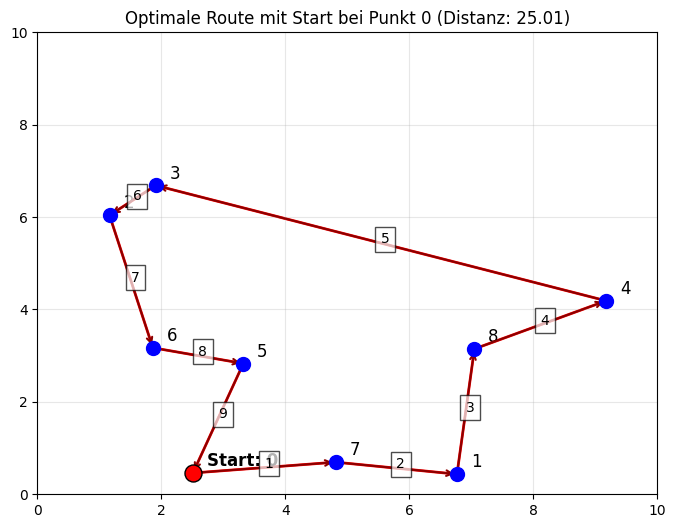

In [35]:
# Visualisiere die beste Route mit festem Startpunkt
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(test_points):
    if i == best_overall[0]:
        plt.scatter(x, y, color='red', s=150, zorder=10, edgecolor='black')
        plt.annotate(f"Start: {i}", (x, y), xytext=(10, 5), textcoords="offset points", fontsize=12, weight='bold')
    else:
        plt.scatter(x, y, color='blue', s=100, zorder=5)
        plt.annotate(f"{i}", (x, y), xytext=(10, 5), textcoords="offset points", fontsize=12)

# Zeichne die Route als geschlossenen Pfad
best_route = best_overall[1]
route_x = [p[0] for p in best_route] + [best_route[0][0]]
route_y = [p[1] for p in best_route] + [best_route[0][1]]
plt.plot(route_x, route_y, 'r-', linewidth=2, zorder=1)

# Zeige die Reihenfolge der Besuche durch nummerierte Pfeile
for i in range(len(best_route)-1):
    plt.annotate("", 
                xy=(best_route[i+1][0], best_route[i+1][1]),
                xytext=(best_route[i][0], best_route[i][1]),
                arrowprops=dict(arrowstyle="->", color='darkred', lw=1.5))
    midx = (best_route[i][0] + best_route[i+1][0]) / 2
    midy = (best_route[i][1] + best_route[i+1][1]) / 2
    plt.text(midx, midy, str(i+1), fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Zeichne den Rückweg zum Startpunkt
plt.annotate("", 
            xy=(best_route[0][0], best_route[0][1]),
            xytext=(best_route[-1][0], best_route[-1][1]),
            arrowprops=dict(arrowstyle="->", color='darkred', lw=1.5))
midx = (best_route[0][0] + best_route[-1][0]) / 2
midy = (best_route[0][1] + best_route[-1][1]) / 2
plt.text(midx, midy, str(len(best_route)), fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.grid(True, alpha=0.3)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title(f"Optimale Route mit Start bei Punkt {best_overall[0]} (Distanz: {best_overall[2]:.2f})")
plt.show()

## 5. Fazit: Brute-Force für das TSP

Der Brute-Force-Algorithmus liefert garantiert die optimale Lösung für das Traveling Salesman Problem, da er systematisch alle möglichen Routen durchsucht. Dies macht ihn zur Referenz für andere Algorithmen, wenn es um die Qualität der Lösung geht.

### Stärken:
- Garantierte optimale Lösung
- Einfach zu implementieren und zu verstehen
- Dient als Baseline für die Bewertung approximativer Algorithmen

### Schwächen:
- Faktoriell wachsende Laufzeit ($O(n!)$)
- Praktisch nur für sehr kleine Probleminstanzen mit maximal 10-12 Punkten anwendbar
- Hoher Speicherbedarf für große Probleminstanzen

### Praxisrelevanz:
In der Praxis wird der Brute-Force-Ansatz für das TSP meist nur für kleine Probleminstanzen oder in Kombination mit Heuristiken verwendet. Für größere Instanzen sind approximative Verfahren wie der Nearest-Neighbor-Algorithmus oder der Christofides-Algorithmus vorzuziehen, die eine gute Balance zwischen Lösungsqualität und Berechnungsaufwand bieten.